In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [45]:
titanic_df=pd.read_csv(r"C:\Users\navug\Desktop\titanic ds\train.csv")

In [46]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:

titanic_df.shape

(891, 12)

In [48]:
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)

In [51]:
titanic_df['Age'].isnull().sum()

0

In [52]:
titanic_df.drop(columns='Cabin',axis=1,inplace=True)

In [53]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [54]:
titanic_df.drop(columns=['PassengerId','Name','Fare','Ticket','Embarked'],axis=1,inplace=True)

In [55]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [58]:
titanic_df['Sex'].replace({'male':0,'female':1},inplace=True)

In [102]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


In [61]:
import seaborn as sns

C:\Users\navug\Anaconda3\ana3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

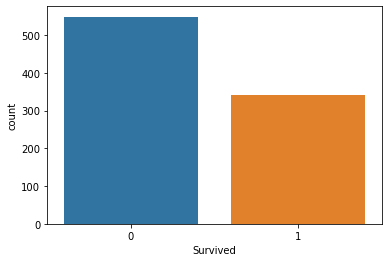

In [62]:
sns.countplot('Survived',data=titanic_df)

C:\Users\navug\Anaconda3\ana3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

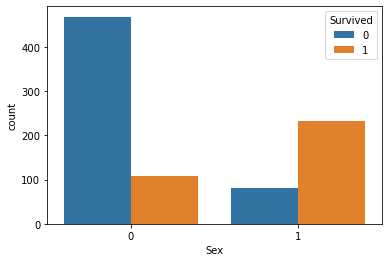

In [63]:
sns.countplot('Sex',hue='Survived',data=titanic_df)

C:\Users\navug\Anaconda3\ana3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

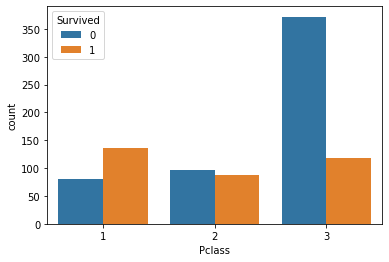

In [66]:
sns.countplot('Pclass',hue='Survived',data=titanic_df)

In [68]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


In [69]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


In [70]:
a=titanic_df.drop(columns='Survived',axis=1)
b=titanic_df['Survived']

,Pclass,Sex,Age,SibSp,Parch
0,3,0,22.000000,1,0
1,1,1,38.000000,1,0
2,3,1,26.000000,0,0
3,1,1,35.000000,1,0
4,3,0,35.000000,0,0
...,...,...,...,...,...
886,2,0,27.000000,0,0
887,1,1,19.000000,0,0
888,3,1,29.699118,1,2
889,1,0,26.000000,0,0


In [72]:
b

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [73]:
scaler=StandardScaler()

In [74]:
scaler.fit_transform(a)

array([[ 0.82737724, -0.73769513, -0.5924806 ,  0.43279337, -0.47367361],
       [-1.56610693,  1.35557354,  0.63878901,  0.43279337, -0.47367361],
       [ 0.82737724,  1.35557354, -0.2846632 , -0.4745452 , -0.47367361],
       ...,
       [ 0.82737724,  1.35557354,  0.        ,  0.43279337,  2.00893337],
       [-1.56610693, -0.73769513, -0.2846632 , -0.4745452 , -0.47367361],
       [ 0.82737724, -0.73769513,  0.17706291, -0.4745452 , -0.47367361]])

In [75]:
a=scaler.fit_transform(a)

In [76]:
a


array([[ 0.82737724, -0.73769513, -0.5924806 ,  0.43279337, -0.47367361],
       [-1.56610693,  1.35557354,  0.63878901,  0.43279337, -0.47367361],
       [ 0.82737724,  1.35557354, -0.2846632 , -0.4745452 , -0.47367361],
       ...,
       [ 0.82737724,  1.35557354,  0.        ,  0.43279337,  2.00893337],
       [-1.56610693, -0.73769513, -0.2846632 , -0.4745452 , -0.47367361],
       [ 0.82737724, -0.73769513,  0.17706291, -0.4745452 , -0.47367361]])

In [77]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,stratify=b,random_state=2)

In [78]:
x_train.shape ,x_test.shape, a.shape

((712, 5), (179, 5), (891, 5))

In [79]:
y_train.shape,y_test.shape,b.shape

((712,), (179,), (891,))

In [80]:
classifier=svm.SVC(kernel='linear')

In [81]:
classifier.fit(x_train, y_train) 

SVC(kernel='linear')

In [83]:
x_train_prediction=classifier.predict(x_train)

In [84]:
training_accuracyscore=accuracy_score(x_train_prediction,y_train)

In [85]:
print('accuracy score is : ' ,training_accuracyscore)

accuracy score is :  0.7893258426966292


In [86]:
x_test_prediction=classifier.predict(x_test)
test_accuracyscore=accuracy_score(x_test_prediction,y_test)

In [87]:
print('accuracy score is : ' ,test_accuracyscore)


accuracy score is :  0.776536312849162


In [96]:
input_data =(3,0,34.5,0,0)
input_data_as_numpy_array = np.asarray(input_data)


input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print('The person didnt survive')
else:
 print('the person survived')

    

[[ 0.82737724 -0.73769513  0.36944878 -0.4745452  -0.47367361]]
[0]
The person didnt survive


In [99]:
import pickle

In [100]:
filename='Titanic_trained_model.sav'
pickle.dump(classifier,open(filename,'wb'))

In [101]:
loaded_model=pickle.load(open('Titanic_trained_model.sav','rb'))